<a href="https://colab.research.google.com/github/SHAIMA-HAQUE/Clustering/blob/main/Clustering_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Libraries***

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ***Import Dataset***

In [ ]:
dataset = pd.read_csv("Online_Retail.csv")
print(dataset)

      Quantity  UnitPrice  CustomerID
0            6       2.55     17850.0
1            6       3.39     17850.0
2            8       2.75     17850.0
3            6       3.39     17850.0
4            6       3.39     17850.0
...        ...        ...         ...
1438        20       1.95     16456.0
1439        30       1.95     16456.0
1440        32       2.95     16456.0
1441        -1       2.10     17841.0
1442        -2       0.85     17841.0

[1443 rows x 3 columns]


In [ ]:
X = dataset.iloc[:,:].values
x1= dataset.iloc[:,0].values
x2= dataset.iloc[:,1].values
x3 = dataset.iloc[:,2].values



# ***Plotting the Data***

[]

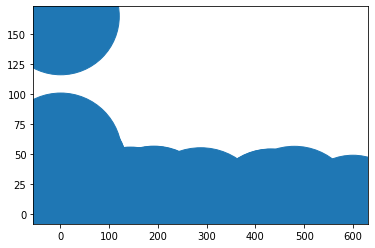

In [ ]:
plt.scatter(x1, x2,x3)
plt.plot()

# ***Removing Instances of NAN and Inf values***

In [ ]:
assert isinstance(dataset, pd.DataFrame), dataset.dropna(inplace=True)
indices_to_keep = ~dataset.isin([np.nan, np.inf, -np.inf]).any(1)
dataset[indices_to_keep].astype(np.float64)

,Quantity,UnitPrice,CustomerID,KMeans
0,6.0,2.55,17850.0,1.0
1,6.0,3.39,17850.0,1.0
2,8.0,2.75,17850.0,1.0
3,6.0,3.39,17850.0,1.0
4,6.0,3.39,17850.0,1.0
...,...,...,...,...
1438,20.0,1.95,16456.0,0.0
1439,30.0,1.95,16456.0,0.0
1440,32.0,2.95,16456.0,0.0
1441,-1.0,2.10,17841.0,1.0


In [ ]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
dataset =dataset[~dataset.isin([np.nan, np.inf, -np.inf]).any(1)]

# ***K - Means***

In [ ]:
from sklearn.cluster import KMeans
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Getting the cluster labels
labels = kmeans.fit_predict(dataset)
dataset["KMeans"]= labels
# Centroid values
centroids = kmeans.cluster_centers_
print("Centroid values")
print(centroids) 


Centroid values
[[1.80093750e+01 3.26462500e+00 1.30021969e+04 2.00000000e+00]
 [7.79417879e+00 3.05097713e+00 1.78138482e+04 1.00000000e+00]
 [1.19126365e+01 3.13850234e+00 1.53176115e+04 1.06581410e-14]]


In [ ]:
print(dataset)


      Quantity  UnitPrice  CustomerID  KMeans
0            6       2.55     17850.0       1
1            6       3.39     17850.0       1
2            8       2.75     17850.0       1
3            6       3.39     17850.0       1
4            6       3.39     17850.0       1
...        ...        ...         ...     ...
1438        20       1.95     16456.0       2
1439        30       1.95     16456.0       2
1440        32       2.95     16456.0       2
1441        -1       2.10     17841.0       1
1442        -2       0.85     17841.0       1

[1442 rows x 4 columns]


# ***Plotting the Clusters and Centroids***

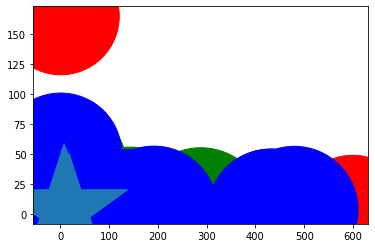

In [ ]:
k=3
#plotting the clusters
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1],points[:,2], c=colors[i])
S = [20*2**n for n in range(len(X))]
#plotting the centroids        
ax.scatter(centroids[:, 0], centroids[:, 1],centroids[:,2],marker='*')